In [2]:
import requests
import json
from pprint import pprint
from tabulate import tabulate
import matplotlib.pyplot as plt
import pandas as pd

api_key = '97ccafc9304a64affd51e2b492d6ac2101532755'
a_url = f'http://www.comicvine.com/api/teams/?api_key={api_key}&filter=name:Avengers&field_list=name,count_of_team_members&format=json'
j_url =f'http://www.comicvine.com/api/teams/?api_key={api_key}&filter=name:justice%20league&field_list=name,count_of_team_members&format=json'

header = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; en-US; rv:1.9.0.20) Gecko/20191130 Firefox/37.0'   
}

a_response = requests.get(a_url, headers=header).json()
j_response = requests.get(j_url, headers=header).json()


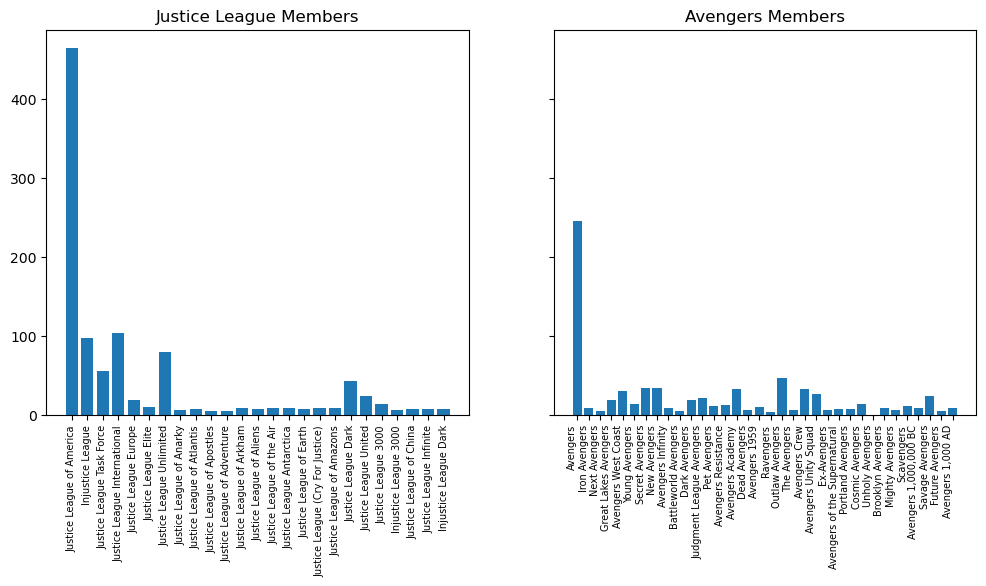

╒══════════════════════════════╤═══════════╕
│ Avengers Team                │   Members │
╞══════════════════════════════╪═══════════╡
│ Avengers                     │       245 │
├──────────────────────────────┼───────────┤
│ Iron Avengers                │         9 │
├──────────────────────────────┼───────────┤
│ Next Avengers                │         5 │
├──────────────────────────────┼───────────┤
│ Great Lakes Avengers         │        19 │
├──────────────────────────────┼───────────┤
│ Avengers West Coast          │        30 │
├──────────────────────────────┼───────────┤
│ Young Avengers               │        14 │
├──────────────────────────────┼───────────┤
│ Secret Avengers              │        34 │
├──────────────────────────────┼───────────┤
│ New Avengers                 │        34 │
├──────────────────────────────┼───────────┤
│ Avengers Infinity            │         8 │
├──────────────────────────────┼───────────┤
│ Battleworld Avengers         │         5 │
├─────────

In [16]:
avengers = a_response['results']
jl = j_response['results']

a_team_members = 0
a_team_members_table = list()
jl_team_members = 0
jl_team_members_table = list()
a_teams = []
a_members = []
jl_teams = []
jl_members = []

for team in avengers:
    a_team_members += team['count_of_team_members']
    a_team_members_table.append([team['name'], team['count_of_team_members']])
    a_teams.append(team['name'])
    a_members.append(team['count_of_team_members'])
a_team_members_table.append(['\033[1mTotal\033[0m', f'\033[1m{a_team_members}\033[0m'])
# a_teams.append("Total")
# a_members.append(a_team_members)
for team in jl:
    jl_team_members += team['count_of_team_members']
    jl_team_members_table.append([team['name'], team['count_of_team_members']])
    jl_teams.append(team['name'])
    jl_members.append(team['count_of_team_members'])
jl_team_members_table.append(['\033[1mTotal\033[0m', f'\033[1m{jl_team_members}\033[0m'])
# jl_teams.append("Total")
# jl_members.append(jl_team_members)

jl_teams.insert(0, jl_teams.pop(3))
jl_members.insert(0, jl_members.pop(3))

figure, ax = plt.subplots(1, 2, sharey=True, figsize=(12,5))
ax[0].bar(jl_teams, jl_members)
ax[0].set_title("Justice League Members")
ax[1].bar(a_teams, a_members)
ax[1].set_title('Avengers Members')
plt.setp(ax[0].get_xticklabels(), rotation='vertical')
ax[0].tick_params(axis='x', labelsize=7)
plt.setp(ax[1].get_xticklabels(), rotation='vertical', horizontalalignment='right',)
ax[1].tick_params(axis='x', labelsize=7)

plt.savefig('jl_v_a.png', bbox_inches='tight')
plt.show()
print(tabulate(a_team_members_table, headers=['Avengers Team', 'Members'], tablefmt="fancy_grid"))
print(tabulate(jl_team_members_table, headers=['Justice League Team', 'Members'], tablefmt="fancy_grid"))

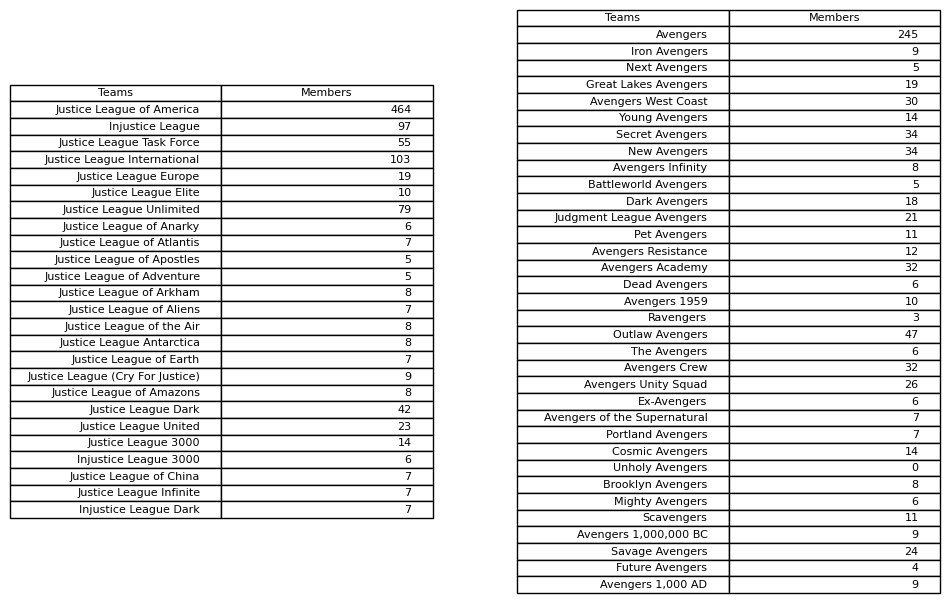

In [8]:
a_df = pd.DataFrame(zip(a_teams, a_members), columns=['Teams', 'Members'])
j_df = pd.DataFrame(zip(jl_teams, jl_members), columns=['Teams', 'Members'])

fig, ax = plt.subplots(1,2, figsize=(12,5))
fig.patch.set_visible(False)
ax[0].axis('off')
ax[1].axis('off')
ax[0].axis('tight')
ax[1].axis('tight')
table = ax[0].table(cellText=j_df.values, colLabels=j_df.columns, loc='center')
table = ax[1].table(cellText=a_df.values, colLabels=a_df.columns, loc='center')
plt.savefig('jl_v_a_tab.pdf', bbox_inches='tight')

In [9]:
print(f"Justice League Teams: {len(jl_teams)}" )
print(f"Avengers Teams: {len(a_teams)}")

Justice League Teams: 25
Avengers Teams: 34


In [10]:
jl_aux = 0
a_aux = 0
for member in jl_members:
    if(member != 464):
        jl_aux += member
for member in a_members:
    if(member != 245):
        a_aux += member

print(f"Justice League Auxilary Members: {jl_aux}" )
print(f"Avengers Auxilary Members: {a_aux}")

Justice League Auxilary Members: 547
Avengers Auxilary Members: 487


In [15]:
a_df.describe()

,Members
count,34.000000
mean,21.529412
std,41.075861
min,0.000000
25%,6.250000
50%,10.500000
75%,23.250000
max,245.000000


In [14]:
j_df.describe()

,Members
count,25.000000
mean,40.440000
std,92.960153
min,5.000000
25%,7.000000
50%,8.000000
75%,23.000000
max,464.000000
